In [1]:
# EffiColorizer modules
from EffiColorizer.preprocessing import *
from EffiColorizer.generator import *
from EffiColorizer.train import *
# other modules
import torch
from PIL import Image

In [ ]:
IMG_SIZE = 320
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

# Load the Pre-Trained Generator

In [ ]:
gen = generator_V2(IMG_SIZE)
gen.load_state_dict(torch.load("Gen.pt", map_location=DEVICE))
gen = gen.to(DEVICE)
gen.eval()

In [4]:
def colorize(path):
    img = Image.open(path).convert("RGB")
    img = transforms.Resize((IMG_SIZE, IMG_SIZE), InterpolationMode.BICUBIC)(img)
    L, _ = rgb_to_lab(img)
    L = L.unsqueeze(1)
    L = L.to(DEVICE)

    with torch.no_grad():
        fake_colors = gen(L)

    colorized_image = lab_to_rgb(L[0], fake_colors[0])
    return colorized_image

## Example Image

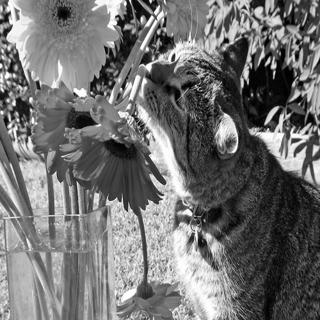

In [13]:
img_path = "example/cat_gray.jpg"
gray_img = Image.open(img_path).convert("RGB")
gray_img

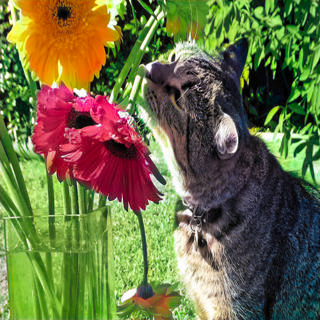

In [14]:
colorized_img = colorize(img_path)
colorized_img.save(f'example/cat_colorized.jpg')
colorized_img

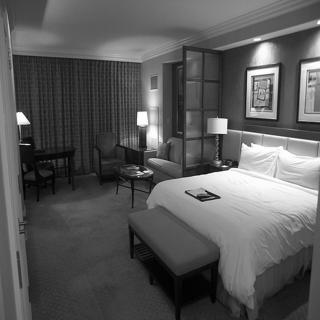

In [15]:
img_path = "example/room_gray.jpg"
gray_img = Image.open(img_path).convert("RGB")
gray_img

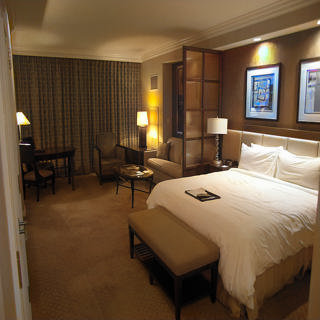

In [16]:
colorized_img = colorize(img_path)
colorized_img.save(f'example/room_colorized.jpg')
colorized_img